# Simulaciones

## Ejercicio 1 - Consigna
- Genere un paquete/modulo o archivo que permita sintetizar las señales descriptas en la imagen. Se espera un link a un pdf con el código y algunas capturas que validen su funcionamiento.

## Ejercicio 1 - Resolución

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from copy import deepcopy as cpy
from dataclasses import dataclass

@dataclass
class PsfWaveformSpec:
  fo_hz: float
  fs_hz: float
  samples_n: int
  ph_rad: float = 0
  amp: float = 1


# Generador de Formas de Onda.
def psf_sine(spec: PsfWaveformSpec):
  amp = 0 if spec.amp < 0 else 1 if spec.amp > 1 else spec.amp
  n = np.arange(spec.samples_n) 
  sn = amp * np.sin((2 * np.pi * spec.fo_hz * n / spec.fs_hz) + spec.ph_rad)
  return (sn + amp) / 2

def psf_square(spec: PsfWaveformSpec):
  return psf_sine(spec) >= (spec.amp / 2)
  
def psf_tri(spec: PsfWaveformSpec):
  amp = 0 if spec.amp < 0 else 1 if spec.amp > 1 else spec.amp
  n = np.arange(spec.samples_n) 
  sn = amp * signal.sawtooth(2 * np.pi * spec.fo_hz * n / spec.fs_hz + spec.ph_rad, .5) 
  return (sn + amp) / 2


# Utilidades.
def psf_spec_to_time_sec(spec: PsfWaveformSpec):
  return np.arange(spec.samples_n) * 1/spec.fs_hz

def psf_gen_cont_and_disc_wvfm(spec: PsfWaveformSpec, fun=psf_sine):
  spec_cont = cpy(spec)
  spec_cont.fs_hz = spec_cont.fs_hz * 100
  spec_cont.samples_n = spec_cont.samples_n * 100
  return (psf_spec_to_time_sec(spec), fun(spec)), (psf_spec_to_time_sec(spec_cont), fun(spec_cont))  

font = {'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)

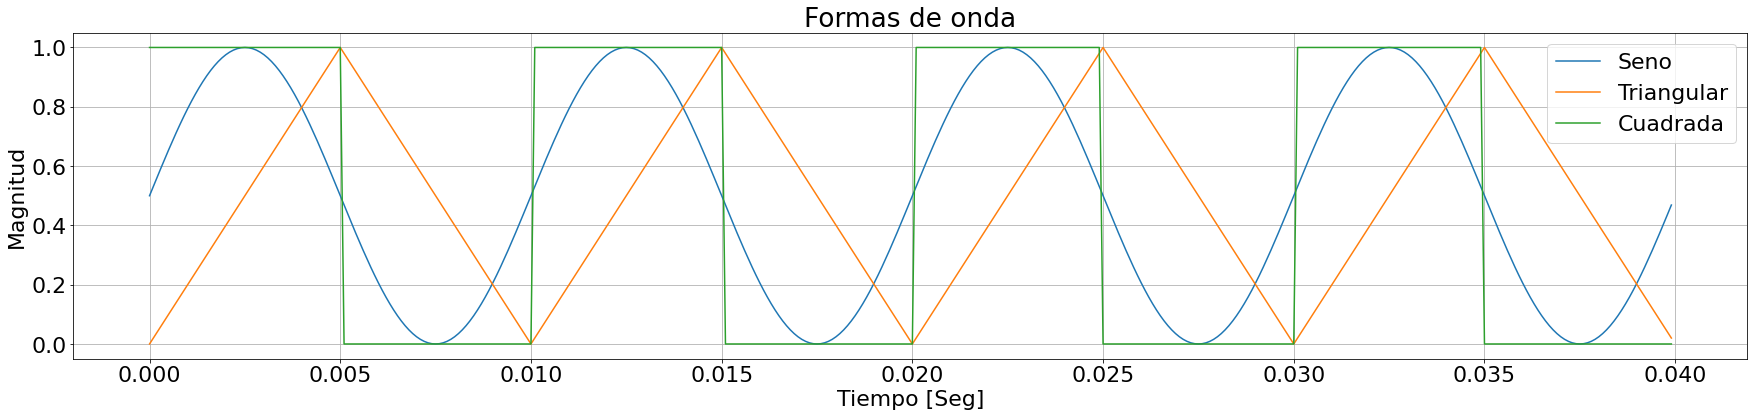

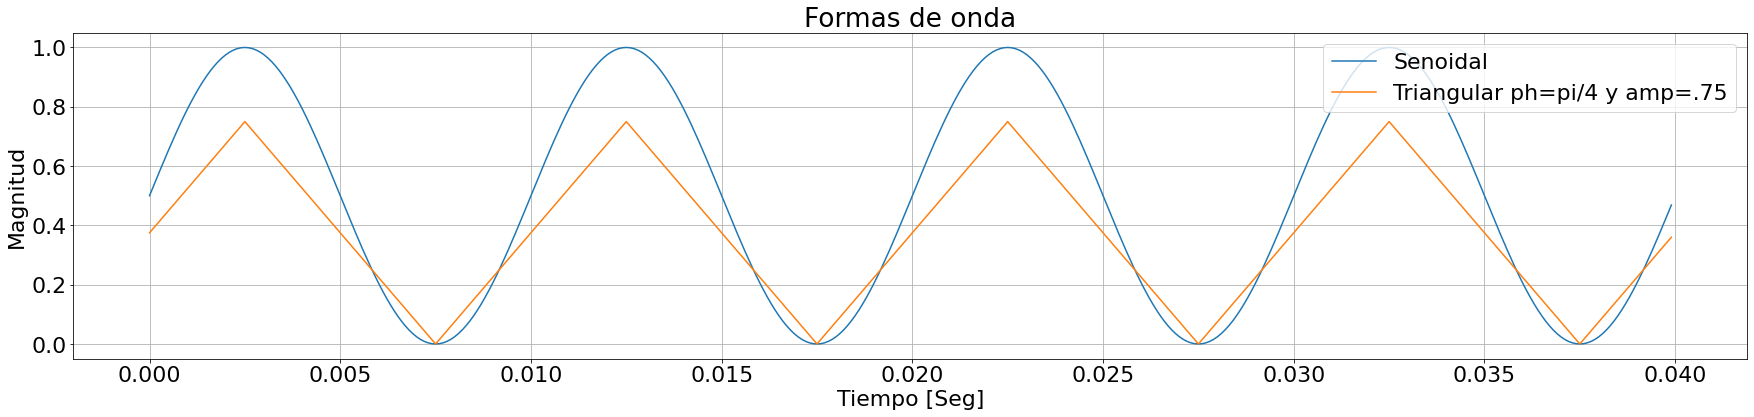

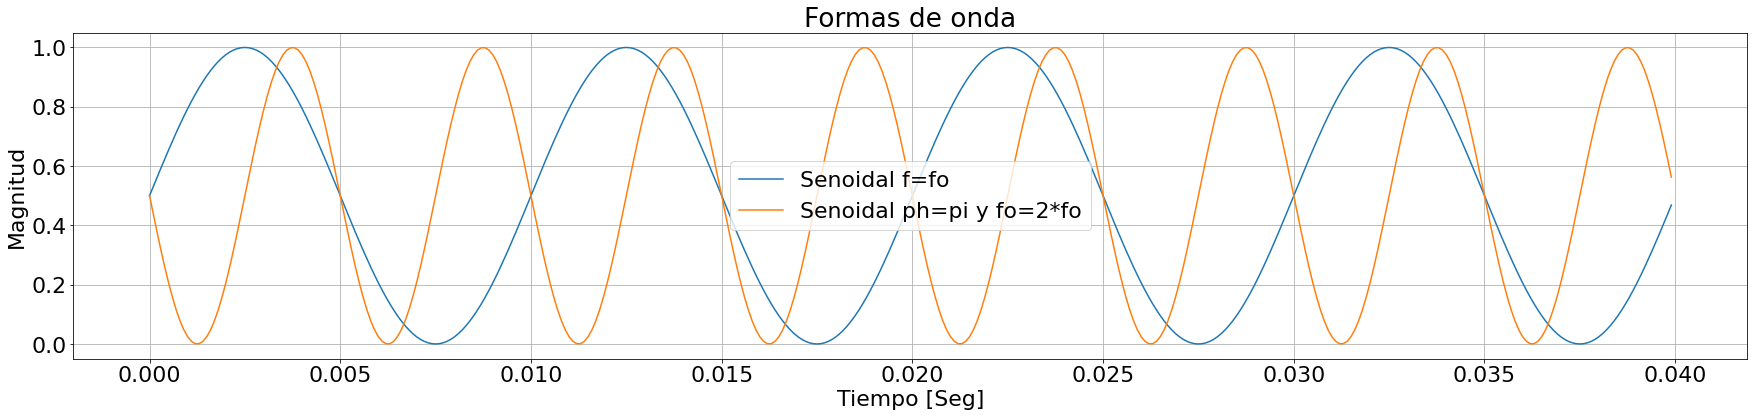

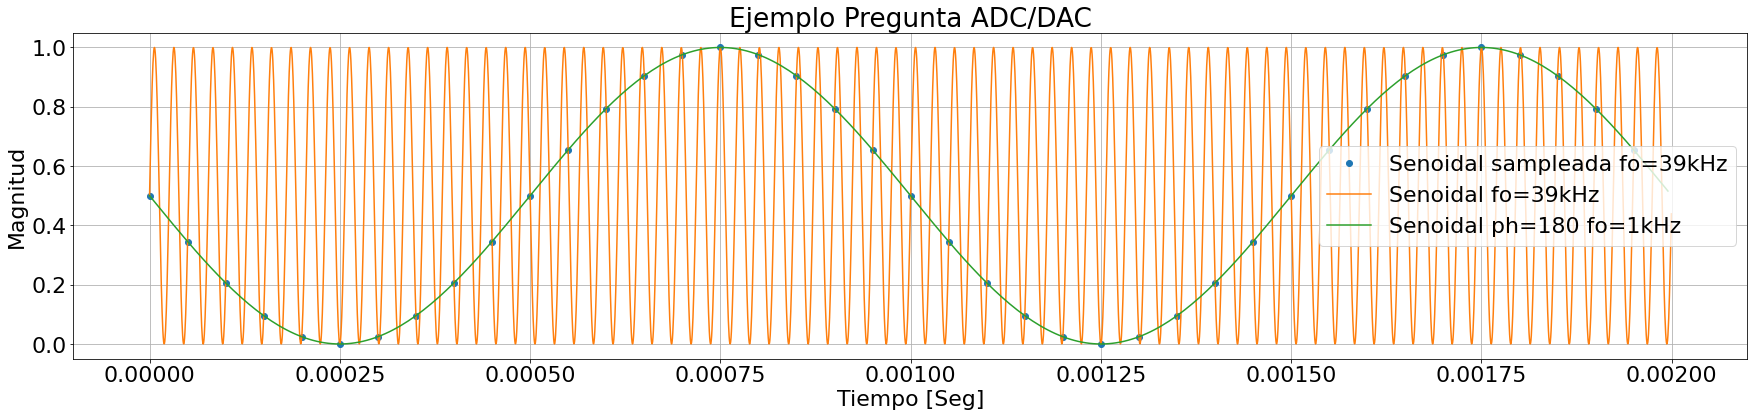

In [10]:
## Specs ##
psf_waveform_spec_discrete = PsfWaveformSpec(
    fo_hz = 100,
    fs_hz = 10000,
    samples_n = 400,
    ph_rad = 0,
    amp = 1
)

psf_waveform_spec_discrete_2 = cpy(psf_waveform_spec_discrete)
psf_waveform_spec_discrete_2.ph_rad = np.pi/2,
psf_waveform_spec_discrete_2.amp = .75

psf_waveform_spec_discrete_3 = cpy(psf_waveform_spec_discrete)
psf_waveform_spec_discrete_3.fo_hz = 200
psf_waveform_spec_discrete_3.ph_rad = np.pi

## Ejemplo ADC/DAC
psf_waveform_spec_discrete_4 = PsfWaveformSpec(
    fo_hz = 39000,
    fs_hz = 20000,
    samples_n = 40,
    ph_rad = 0,
    amp = 1
)

psf_waveform_spec_discrete_5 = PsfWaveformSpec(
    fo_hz = 39000,
    fs_hz = 2000000,
    samples_n = 4000,
    ph_rad = 0,
    amp = 1
)

psf_waveform_spec_discrete_6 = PsfWaveformSpec(
    fo_hz = 1000,
    fs_hz = 200000,
    samples_n = 400,
    ph_rad = np.pi,
    amp = 1
)


## Signals ##

sine = psf_sine(psf_waveform_spec_discrete)
triangular = psf_tri(psf_waveform_spec_discrete)
square = psf_square(psf_waveform_spec_discrete)
time = psf_spec_to_time_sec(psf_waveform_spec_discrete)

tri_2 = psf_tri(psf_waveform_spec_discrete_2)
sine_2 = psf_sine(psf_waveform_spec_discrete_2)
sine_3 = psf_sine(psf_waveform_spec_discrete_3)


sine_4 = psf_sine(psf_waveform_spec_discrete_4)
t_4 = psf_spec_to_time_sec(psf_waveform_spec_discrete_4)
sine_5 = psf_sine(psf_waveform_spec_discrete_5)
t_5 = psf_spec_to_time_sec(psf_waveform_spec_discrete_5)
sine_6 = psf_sine(psf_waveform_spec_discrete_6)
t_6 = psf_spec_to_time_sec(psf_waveform_spec_discrete_6)


## Plots ##
plt.figure(figsize=(30, 6))
plt.title('Formas de onda')
plt.plot(time, sine, label='Seno')
plt.plot(time, triangular, label='Triangular')
plt.plot(time, square, label='Cuadrada')
plt.grid()
plt.legend()
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Magnitud')
plt.show()

plt.figure(figsize=(30, 6))
plt.title('Formas de onda')
plt.plot(time, sine, label='Senoidal')
plt.plot(time, tri_2, label='Triangular ph=pi/4 y amp=.75')
plt.grid()
plt.legend()
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Magnitud')
plt.show()


plt.figure(figsize=(30, 6))
plt.title('Formas de onda')
plt.plot(time, sine, label='Senoidal f=fo')
plt.plot(time, sine_3, label='Senoidal ph=pi y fo=2*fo')
plt.grid()
plt.legend()
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Magnitud')
plt.show()

plt.figure(figsize=(30, 6))
plt.title('Ejemplo Pregunta ADC/DAC')
plt.plot(t_4, sine_4, 'o', label='Senoidal sampleada fo=39kHz')
plt.plot(t_5, sine_5, label='Senoidal fo=39kHz')
plt.plot(t_6, sine_6, label='Senoidal ph=180 fo=1kHz')
plt.grid()
plt.legend()
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Magnitud')
plt.show()


## Ejercicio 2 - Consigna

-  Utilizando la funcion senoidal confeccionada en el enunciado anterior, siga los pasos indicados en la imagen y suba un pdf con los resultados. NOTA: cuando dice en 2.1 por ej f0=0.1 * fs, lo que pide es que la frecuencia de la señal de entrada sea un 10% del valor de la frecuencia de sampleo. Si elijen fs=100 entonces f0=10 y f0=110. Cuando grafiquen estas dos señales se pide que indique como haría para diferenciarlas (si fuera posible). Lo mismo para el 2.2, con el detalle que ademas se pide evaluar la fase entre los dos casos del experimento. Es decir las respuestas a 2.1 y 2.2 aunque podrían argumentarlas teóricamente, se invita a que grafiquen los casos y estos revelen la situación para que puedan responder en base a estos.

## Ejercicio 2.1 - Resolución

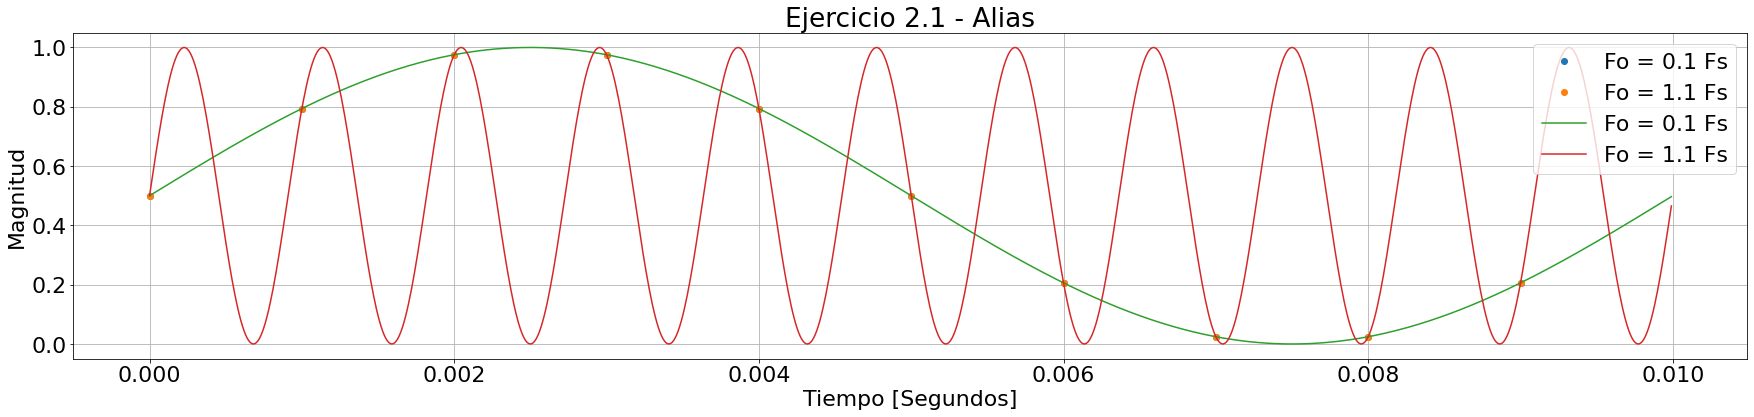

In [11]:
# Ex. 2.1
psf_waveform_spec_discrete = PsfWaveformSpec(
    fo_hz = 100,
    fs_hz = 1000,
    samples_n = 10,
    ph_rad = 0,
    amp = 1
)

spec_2_1_a = cpy(psf_waveform_spec_discrete)
spec_2_1_a.fo_hz = spec_2_1_a.fs_hz * 0.1

spec_2_1_b = cpy(psf_waveform_spec_discrete)
spec_2_1_b.fo_hz = spec_2_1_a.fs_hz * 1.1

(t1d, f1d), (t1c, f1c) = psf_gen_cont_and_disc_wvfm(spec_2_1_a)
(t2d, f2d), (t2c, f2c) = psf_gen_cont_and_disc_wvfm(spec_2_1_b)

plt.figure(figsize=(30, 6))
plt.title('Ejercicio 2.1 - Alias')
plt.plot(t1d, f1d, 'o', label='Fo = 0.1 Fs')
plt.plot(t2d, f2d, 'o', label='Fo = 1.1 Fs')
plt.plot(t1c, f1c, label='Fo = 0.1 Fs')
plt.plot(t2c, f2c, label='Fo = 1.1 Fs')
plt.grid()
plt.legend()
plt.xlabel('Tiempo [Segundos]')
plt.ylabel('Magnitud')
plt.show()

## Ejercicio 2.1 - Comentarios

Se observa que para ambas funciones la muestras obtenidas son exactamente las mismas. 
Este fenómeno de repetición es propio de muestrear señales que superan frecuencia de sampleo de Shannon-Nyquist (aliasing). 

En cuanto a si las señales pueden diferenciarse, la respuesta es que no: la información que ingresa al sistema al muestrear cualquiera de estas dos señales es exactamente la misma, por lo cual, son indistinguibles. 

La _solución_ correcta en este caso sería no permitir el ingreso al sistema de señales que superen `fs/2` (filtro anti-alias) o muestrear  una frecuencia del doble de la señal de máxima frecuencia y así poder distinguirlas. De esta manera, se puodría garantizar una reconstrucción/interpretación _fiel_ de la señal entrante.

## Ejercicio 2.2 - Resolución


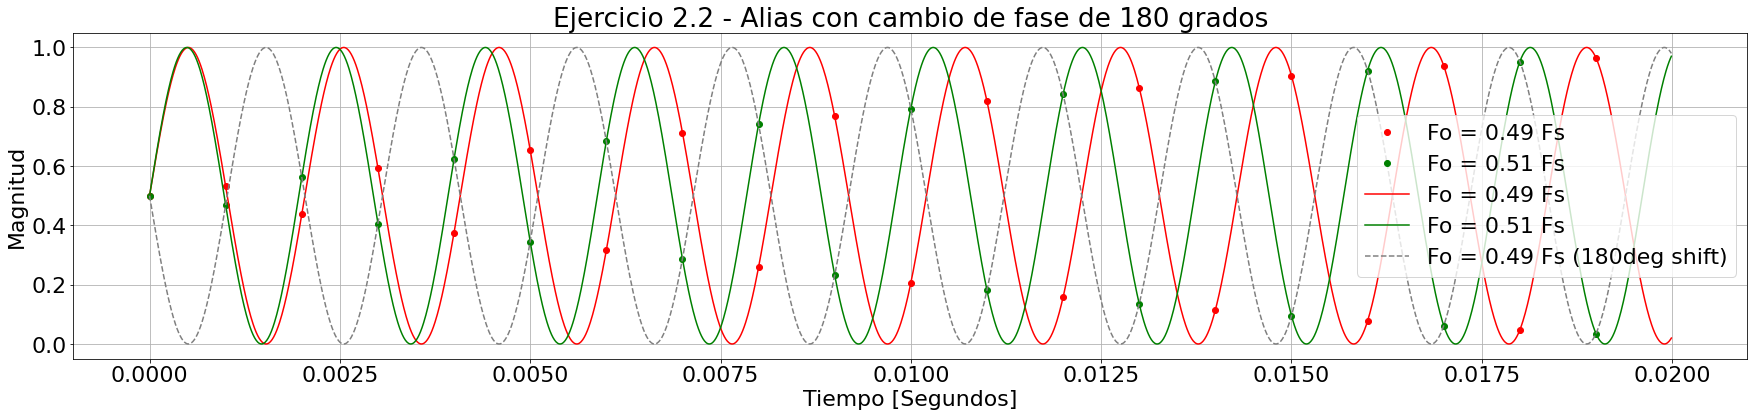

In [12]:
psf_waveform_spec_discrete = PsfWaveformSpec(
    fo_hz = 100,
    fs_hz = 1000,
    samples_n = 20,
    ph_rad = 0,
    amp = 1
)


spec_2_2_a = cpy(psf_waveform_spec_discrete)
spec_2_2_a.fo_hz = spec_2_1_a.fs_hz * 0.49

spec_2_2_b = cpy(psf_waveform_spec_discrete)
spec_2_2_b.fo_hz = spec_2_1_a.fs_hz * 0.51

spec_2_2_c = cpy(psf_waveform_spec_discrete)
spec_2_2_c.ph_rad = np.pi
spec_2_2_c.fo_hz = spec_2_1_a.fs_hz * 0.49

(t1d, f1d), (t1c, f1c) = psf_gen_cont_and_disc_wvfm(spec_2_2_a)
(t2d, f2d), (t2c, f2c) = psf_gen_cont_and_disc_wvfm(spec_2_2_b)
(t3d, f3d), (t3c, f3c) = psf_gen_cont_and_disc_wvfm(spec_2_2_c)

plt.figure(figsize=(30, 6))
plt.title('Ejercicio 2.2 - Alias con cambio de fase de 180 grados')
plt.plot(t1d, f1d, 'o', color='r', label='Fo = 0.49 Fs')
plt.plot(t2d, f2d, 'o', color='g',label='Fo = 0.51 Fs')
plt.plot(t1c, f1c, color='r', label='Fo = 0.49 Fs')
plt.plot(t2c, f2c, color='g', label='Fo = 0.51 Fs')
plt.plot(t3c, f3c, '--',color='gray',label='Fo = 0.49 Fs (180deg shift)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo [Segundos]')
plt.ylabel('Magnitud')
plt.show()

## Ejercicio 2.2 - Comentarios
La frecuencia de las señales obtenidas es la misma, pero se encuentran desfasadas 180 grados. 
De nuevo, esto es consecuencia del aliasing en la segunda señal, `fo = 0.51 fs`, que supera la frecuencia de Shannon-Nyquist.
Se puede observar en el gráfico como las muestras tomadas de la señal `fo = 0.51 fs` conciden perfectamente con una senoidal de `fo = 0.49 fs` desfasada 180 grados (curva en linea discontínua). 

# CIAA
## Ejercicio A - Consigna
-  Escriba un codigo en C para la CIAA que dado q7_t a= 0x040 y q7_t b=0x23, calcule q7_t c = a*b e imprima el resultado en hexadecimal y decimal. Indique su política con respecto al redondeo

## Ejercicio A - Resolución
### Código C
```c
#include "sapi.h"
#include "arm_math.h"

q7_t q7_multiply(q15_t a, q15_t b) {
   q15_t res = (a * b) << 1; // q14 -> q15.
   return (q7_t) (res >> 8); // Trunco.
}


uint16_t q7_print(q7_t n, char *buf)
{
   int i;
   float ans=(n&0x80)?-1:0;
   for(i=1;i<8;i++)
   {
      if(n&(0x80>>i)){
         ans+=1.0/(1U<<i);
      }
   }
   return sprintf(buf,"q7: 0x%x (%i dec); float:%.20f\r\n", n, n, ans);
}


int main ( void ) {
   uint16_t sample = 0;
   int16_t len;
   char buf [200] = {0};

   boardConfig (                  );
   uartConfig  ( UART_USB, 460800 );
   adcConfig   ( ADC_ENABLE       );
   cyclesCounterInit ( EDU_CIAA_NXP_CLOCK_SPEED );

   q7_t a = 0x040;
   q7_t b = 0x023;
   
   for(;;) {
      cyclesCounterReset();
      len = q7_print(q7_multiply(a, b), buf);
      uartWriteByteArray (UART_USB, buf ,len);
      gpioToggle (LED1);
      delay(500);
   }
}
```
## Ejercicio A - Comentarios

El valor obtenido en la EDU-CIAA-NXP fue el siguiente
```
0x11 -> 17 (decimal) -> 0.1328125
```
Se ha optado por truncar los bits menos significavos. Consecuentemente, 
el resultado que en Q15 hubiese sido 0x1180 resultó siendo 0x11 en Q7. El valor 
truncado, 0x0080, en Q15 representa 2**-8. Este es precisamente el error entre 
el resultado real de la cuenta propuesta y el obtenido en formato Q7.

## Ejercicio B - Consigna

Genere con un tono de LA-440. Digitice con 10 y luego con 4 bits, envíe los datos a la PC y graﬁque:
1. Señal original con su máximo, mínimo y RMS
1. Señal adquirida con su máximo, mínimo y RMS
   
Hay diferencias? a que se deben?. Suba un pdf con los códigos, los gráficos y algunas fotos/video del hardware utilizado.

## Ejercicio B - Resolución

### Código C

```c
#include "sapi.h"
#include "arm_math.h"



/* ************************************************************************* */
/*                               Configuration                               */
/* ************************************************************************* */
# define   SIGNAL_10B         0
# define   SIGNAL_4B          1
# define   SIGNAL_ORIGINAL    2

#define PSF_MODE  SIGNAL_10B

uint32_t tick   = 0   ;
uint16_t tone   = 440 ;

/* ************************************************************************* */
/*                                    Code                                   */
/* ************************************************************************* */
struct header_struct {
   char     head[4];
   uint32_t id;
   uint16_t N;
   uint16_t fs ;
   uint32_t maxIndex;
   uint32_t minIndex;
   q15_t    maxValue;
   q15_t    minValue;
   q15_t    rms;
   char     tail[4];
} header={"head",0,128,10000,0,0,0,0,0,"tail"};


int main ( void ) {
   uint16_t sample = 0;
   int16_t adc [ header.N ];
   boardConfig (                  );
   uartConfig  ( UART_USB, 460800 );
   adcConfig   ( ADC_ENABLE       );
   dacConfig   ( DAC_ENABLE       );
   cyclesCounterInit ( EDU_CIAA_NXP_CLOCK_SPEED );
   while(1) {
      cyclesCounterReset();
      float t=(tick/(float)header.fs);
      tick++;
      q15_t og_sample = 512*arm_sin_f32(t*2*PI*tone);
      #if PSF_MODE == SIGNAL_10B
         adc[sample] = (((adcRead(CH1)-512)) << 6);
      #elif PSF_MODE == SIGNAL_4B
         adc[sample] = (((adcRead(CH1)-512)) >> 6 << 12);
      #elif PSF_MODE == SIGNAL_ORIGINAL
         adc[sample] = og_sample << 6;
      #endif
      uartWriteByteArray ( UART_USB ,(uint8_t* )&adc[sample] ,sizeof(adc[0]) );
      dacWrite(DAC, og_sample + 512);
      if ( ++sample==header.N ) {
         gpioToggle ( LEDR ); // este led blinkea a fs/N
         arm_max_q15 ( adc, header.N, &header.maxValue,&header.maxIndex );
         arm_min_q15 ( adc, header.N, &header.minValue,&header.minIndex );
         arm_rms_q15 ( adc, header.N, &header.rms                       );
         //trigger(2);
         header.id++;
         uartWriteByteArray ( UART_USB ,(uint8_t*)&header ,sizeof(header ));
         adcRead(CH1); //why?? hay algun efecto minimo en el 1er sample.. puede ser por el blinkeo de los leds o algo que me corre 10 puntos el primer sample. Con esto se resuelve.. habria que investigar el problema en detalle
         sample = 0;
      }
      gpioToggle ( LED1 );                                           // este led blinkea a fs/2
      while(cyclesCounterRead()< EDU_CIAA_NXP_CLOCK_SPEED/header.fs) // el clk de la CIAA es 204000000
         ;
   }
}
```

### Código Python

```python
#!python3
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.animation import FuncAnimation
import os
import io
import serial

STREAM_FILE=("/dev/ttyUSB1","serial")
#STREAM_FILE=("log.bin","file")

adc   =  None
header = { "head": b"head", "id": 0, "N": 128, "fs": 10000, "maxIndex":0, "minIndex":0, "maxValue":0, "minValue":0, "rms":0, "tail":b"tail" }
fig    = plt.figure ( 1 )

adcAxe = fig.add_subplot ( 2,1,1                            )
adcLn, = plt.plot        ( [],[],'r-',linewidth=4           )
minValueLn, = plt.plot   ( [],[],'g-',linewidth=2,alpha=0.3 )
maxValueLn, = plt.plot   ( [],[],'y-',linewidth=2,alpha=0.3 )
rmsLn, = plt.plot        ( [],[],'b-',linewidth=2,alpha=0.3 )
minIndexLn, = plt.plot   ( [],[],'go',linewidth=6,alpha=0.8 )
maxIndexLn, = plt.plot   ( [],[],'yo',linewidth=6,alpha=0.8 )

adcAxe.grid              ( True                             )
adcAxe.set_ylim          ( -1.7 ,1.7                            )

text = adcAxe.text(0, 1.5, 'No Data')

fftAxe = fig.add_subplot ( 2,1,2                  )
fftLn, = plt.plot        ( [],[],'b-',linewidth=4 )
fftAxe.grid              ( True                   )
fftAxe.set_ylim          ( 0 ,0.2                )

def findHeader(f,h):
    find=False
    while(not find):
        data=bytearray(len(h["head"]))
        while data!=h["head"]:
            data+=f.read(1)
            del data[0]

        h["id"]       = readInt4File(f,4)
        h["N" ]       = readInt4File(f)
        h["fs"]       = readInt4File(f)
        h["maxIndex"] = readInt4File(f,4)
        h["minIndex"] = readInt4File(f,4)
        h["maxValue"] = (readInt4File(f,sign = True)*1.65)/(2**6*512)
        h["minValue"] = (readInt4File(f,sign = True)*1.65)/(2**6*512)
        h["rms"]      = (readInt4File(f,sign = True)*1.65)/(2**6*512)

        data=bytearray(b'1234')
        for i in range(len(h["tail"])):
            data+=f.read(1)
            del data[0]
        find = data==h["tail"]
    print({k:round(v,2) if isinstance(v,float) else v for k,v in h.items()})
    return h["id"],h["N"],h["fs"],h["minValue"],h["maxValue"],h["rms"],h["minIndex"],h["maxIndex"]

def readInt4File(f,size=2,sign=False):
    raw=f.read(1)
    while( len(raw) < size):
        raw+=f.read(1)
    return (int.from_bytes(raw,"little",signed=sign))

def flushStream(f,h):
    if(STREAM_FILE[1]=="serial"): #pregunto si estoy usando la bibioteca pyserial o un file
        f.flushInput()
    else:
        f.seek ( 2*h["N"],io.SEEK_END)

def readSamples(adc,N,trigger=False,th=0):
    state="waitLow" if trigger else "sampling"
    i=0
    for t in range(N):
        sample = (readInt4File(streamFile,sign = True)*1.65)/(2**6*512)
        state,nextI= {
                "waitLow" : lambda sample,i: ("waitHigh",0) if sample<th else ("waitLow" ,0),
                "waitHigh": lambda sample,i: ("sampling",0) if sample>th else ("waitHigh",0),
                "sampling": lambda sample,i: ("sampling",i+1)
                }[state](sample,i)
        adc[i]=sample
        i=nextI

def update(t):
    global header
    global adc
    flushStream ( streamFile,header )
    id,N,fs,minValue,maxValue,rms,minIndex,maxIndex=findHeader ( streamFile,header )
    adc   = np.zeros(N)
    time  = np.arange(0,N/fs,1/fs)
    readSamples(adc,N,False,-1.3)

    adcAxe.set_xlim     ( 0    ,N/fs              )
    adcLn.set_data      ( time ,adc               )
    minValueLn.set_data ( time,minValue           )
    maxValueLn.set_data ( time,maxValue           )
    rmsLn.set_data      ( time,rms                )
    minIndexLn.set_data ( time[minIndex],minValue )
    maxIndexLn.set_data ( time[maxIndex],maxValue )
    text.set_text(str(header))

    fft=np.abs ( 1/N*np.fft.fft(adc ))**2
    fftAxe.set_ylim ( 0 ,np.max(fft)+0.05)
    fftAxe.set_xlim ( 0 ,fs/2 )
    fftLn.set_data ( (fs/N )*fs*time ,fft)

    return adcLn, fftLn, minValueLn, maxValueLn, rmsLn, minIndexLn, maxIndexLn, text

#seleccionar si usar la biblioteca pyserial o leer desde un archivo log.bin
if(STREAM_FILE[1]=="serial"):
    streamFile = serial.Serial(port=STREAM_FILE[0],baudrate=460800,timeout=None)
else:
    streamFile=open(STREAM_FILE[0],"rb",0)

ani=FuncAnimation(fig,update,1000,init_func=None,blit=True,interval=1,repeat=True)
plt.draw()
plt.get_current_fig_manager().window.showMaximized() #para QT5
plt.show()
streamFile.close()
```
## Ejercicio B - Capturas

### Hardware
Se muestran a continuación fotos del hardware utilizado.

![HW1](images/hardware/photo_2022-07-10_00-41-01.jpg)

![HW2](images/hardware/photo_2022-07-10_00-41-06.jpg)

![HW3](images/hardware/photo_2022-07-10_00-41-10.jpg)

### Señales

Se muestran a continuación capturas de las señales obtenidas.

### Señal Original

![OG](images/signals/original.png)

### Señal Digitalizada a 10 bits

![10b](images/signals/10_bits.png)

### Señal Digitalizada a 4 bits

![4b](images/signals/4_bits.png)

### Comparación

| Señal    	| Máximo 	| Mínimo 	| RMS   	| Máximo en 440Hz 	|
|----------	|--------	|--------	|-------	|-----------------	|
| Original 	| 1.647  	| -1.647 	| 1.173 	| ~0.45           	|
| 10-bits  	| 1.466  	| -1.563 	| 1.062 	| ~0.35           	|
| 4-bits   	| 1.444  	| -1.65  	| 1.029 	| ~0.30           	|

## Ejercicio B - Comentarios

La principal diferencia se observa en comparación a la señal original, donde 
esta última cuenta con levemente mayor extrusión que las señales medidas. 
Esto es de esperarse, por la atenuación propia del circuito de entrada. 
Lo mismo ocurre con el valor RMS. 

En cuanto a la comparación entre las señales digitalizadas en 10 y 4 bits, 
no se observan notorias diferencias en máximos, mínimos y valores RMS. Esto
se debe a que, si bien la cuantización en el Ejercicio 2.1 se ha realizado a 
efectos de reducir la resolución, la ganancia se ha ajustado para que en ambos 
casos la amplitud de la señal fuera similar. 

Es relevante notar las diferencias espectrales entre las señales. En frecuencia, 
se observa que la señal digitalizada en 4-bits cuenta con pequeños picos en
bines alejados de la  `fo` original (440Hz). Esto se debe al ruido de 
cuantización, que aleja a la señal generada de una senoidal pura y le aporta
componentes de frecuencia insdeseados por los abruptos cambios de nivel. Además, 
incide en la relación señal a ruido, ya que no solo aparecen componentes
en frecuencias indeseadas, sino que la potencia distribuida en ellos es a 
expsensas de aquella de la componente principal de 440Hz. Esto se
hace evidente en la comparación, donde si bien la extrusión y el RMS de las
señales es muy similar (~ 3% de varaición en el RMS), la diferencia entre el
nivel de los picos es mucho mayor (~17%) en favor a la señal de 10-bits.

